In [ ]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [9]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('/Users/bogdanchernysh/py-restaurant-data-analysis/db.sqlite3')
cursor = conn.cursor()

query = """
    SELECT *
    FROM restaurant_order
    INNER JOIN restaurant_orderitem ON restaurant_order.id = restaurant_orderitem.order_id
    INNER JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
"""

df = pd.read_sql_query(query, conn)
df.to_csv('combined_data.csv', index=False)

df = pd.read_csv('combined_data.csv')
print(len(df))

conn.close()



74818


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

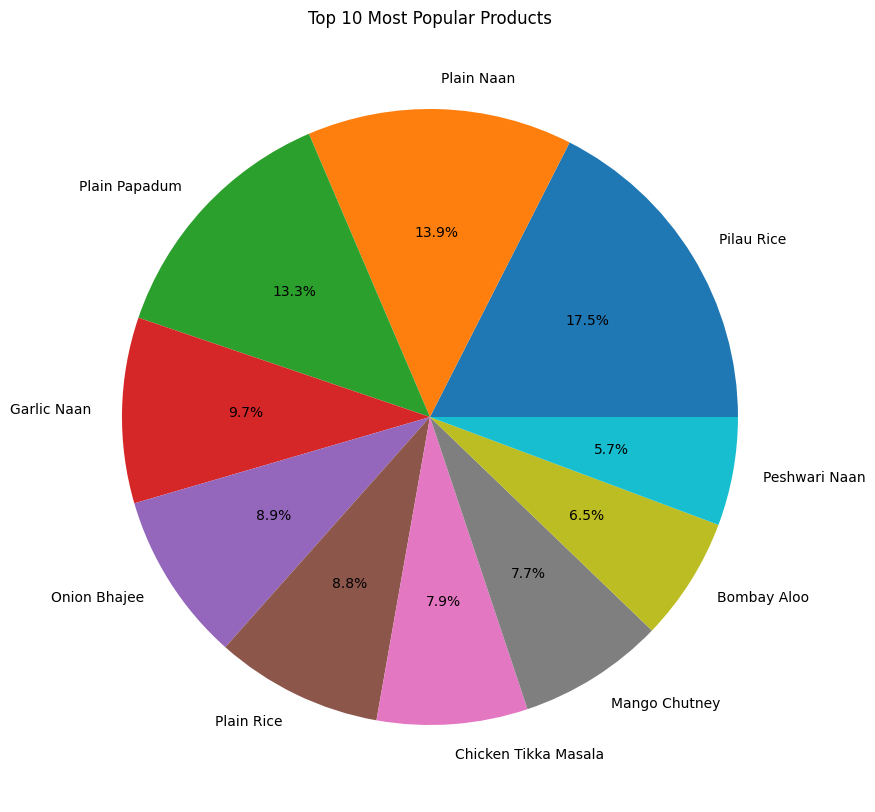

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение уже объединенного CSV-файла в DataFrame
df = pd.read_csv('combined_data.csv')

# Расчет количества продаж каждого продукта
product_counts = df['name'].value_counts()

# Отбор топ-10 продуктов по количеству продаж
top_10_products = product_counts.head(10)

# Создание круговой диаграммы
plt.figure(figsize=(10, 10))
plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%')
plt.title('Top 10 Most Popular Products')
plt.show()


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

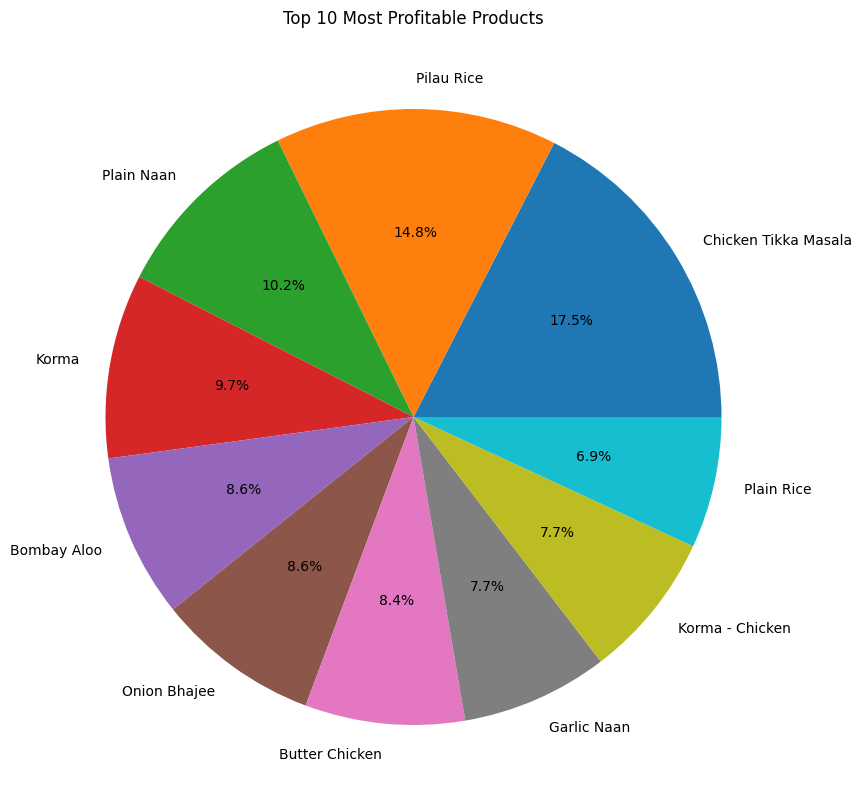

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение уже объединенного CSV-файла в DataFrame
df = pd.read_csv('combined_data.csv')

# Вычисление 'Item Price' для каждого элемента заказа
df['item_price'] = df['price'] * df['quantity']

# Группировка по 'name' и подсчет общей 'Item Price' для каждого продукта
product_sales = df.groupby('name')['item_price'].sum()

# Отбор топ-10 продуктов по 'Item Price'
top_10_products_sales = product_sales.sort_values(ascending=False).head(10)

# Создание круговой диаграммы
plt.figure(figsize=(10, 10))
plt.pie(top_10_products_sales, labels=top_10_products_sales.index, autopct='%1.1f%%')
plt.title('Top 10 Most Profitable Products')
plt.show()


# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

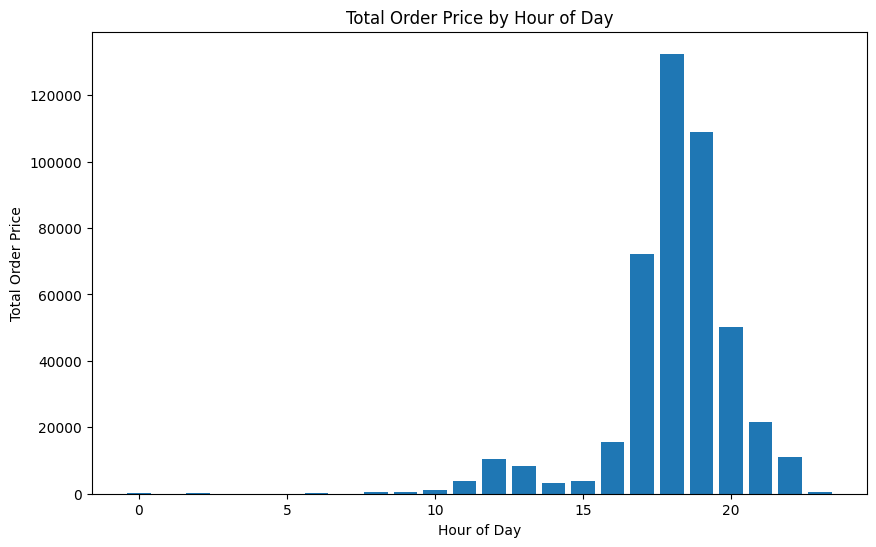

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('combined_data.csv')

df['datetime'] = pd.to_datetime(df['datetime'])
df['Order Hour'] = df['datetime'].dt.hour

df['Profit'] = df['price'] * df['quantity']

profit_for_each_hour = df.groupby('Order Hour')['Profit'].sum()

plt.figure(figsize=(10,6))
plt.bar(profit_for_each_hour.index, profit_for_each_hour.values)
plt.xlabel('Hour of Day')
plt.ylabel('Total Order Price')
plt.title('Total Order Price by Hour of Day')
plt.show()




# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

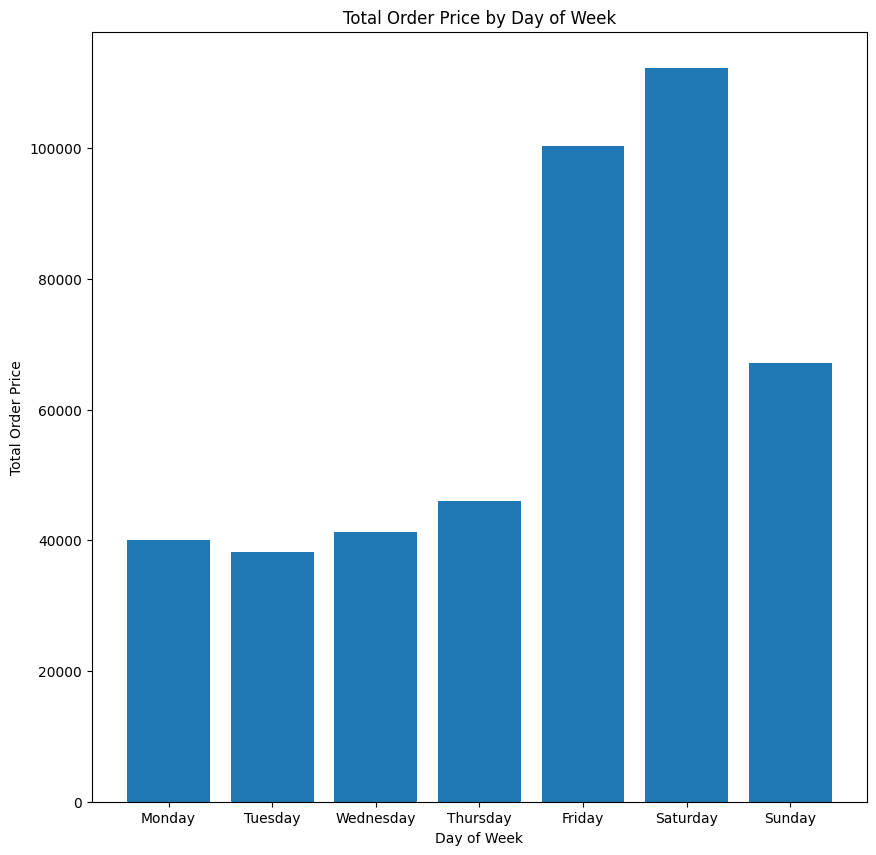

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('combined_data.csv')

df['datetime'] = pd.to_datetime(df['datetime'])
df['order_day'] = df['datetime'].dt.day_name()

df['Profit'] = df['price'] * df['quantity']

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


profit_for_each_day_of_week = df.groupby('order_day')['Profit'].sum()
profit_for_each_day_of_week = profit_for_each_day_of_week.reindex(days_of_week)


plt.figure(figsize=(10, 10))
plt.bar(profit_for_each_day_of_week.index, profit_for_each_day_of_week.values)
plt.xlabel('Day of Week')
plt.ylabel('Total Order Price')
plt.title('Total Order Price by Day of Week')
plt.show()
